<a href="https://www.kaggle.com/code/thirumani/shark-tank-india-analysis?scriptVersionId=116774090" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Shark Tank India (Season 1 & Season 2) Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Jan-19


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/2/2f/Shark_Tank_India.jpg', width=330, height=330)

### Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

### Check and import dataset

In [4]:
! ls -l /kaggle/input/d/thirumani/shark-tank-india/
shark_tank = pd.read_csv('/kaggle/input/d/thirumani/shark-tank-india//Shark Tank India.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 40
-rw-r--r-- 1 nobody nogroup 40077 Jan 19 11:37 'Shark Tank India.csv'

There are 193 rows and 56 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

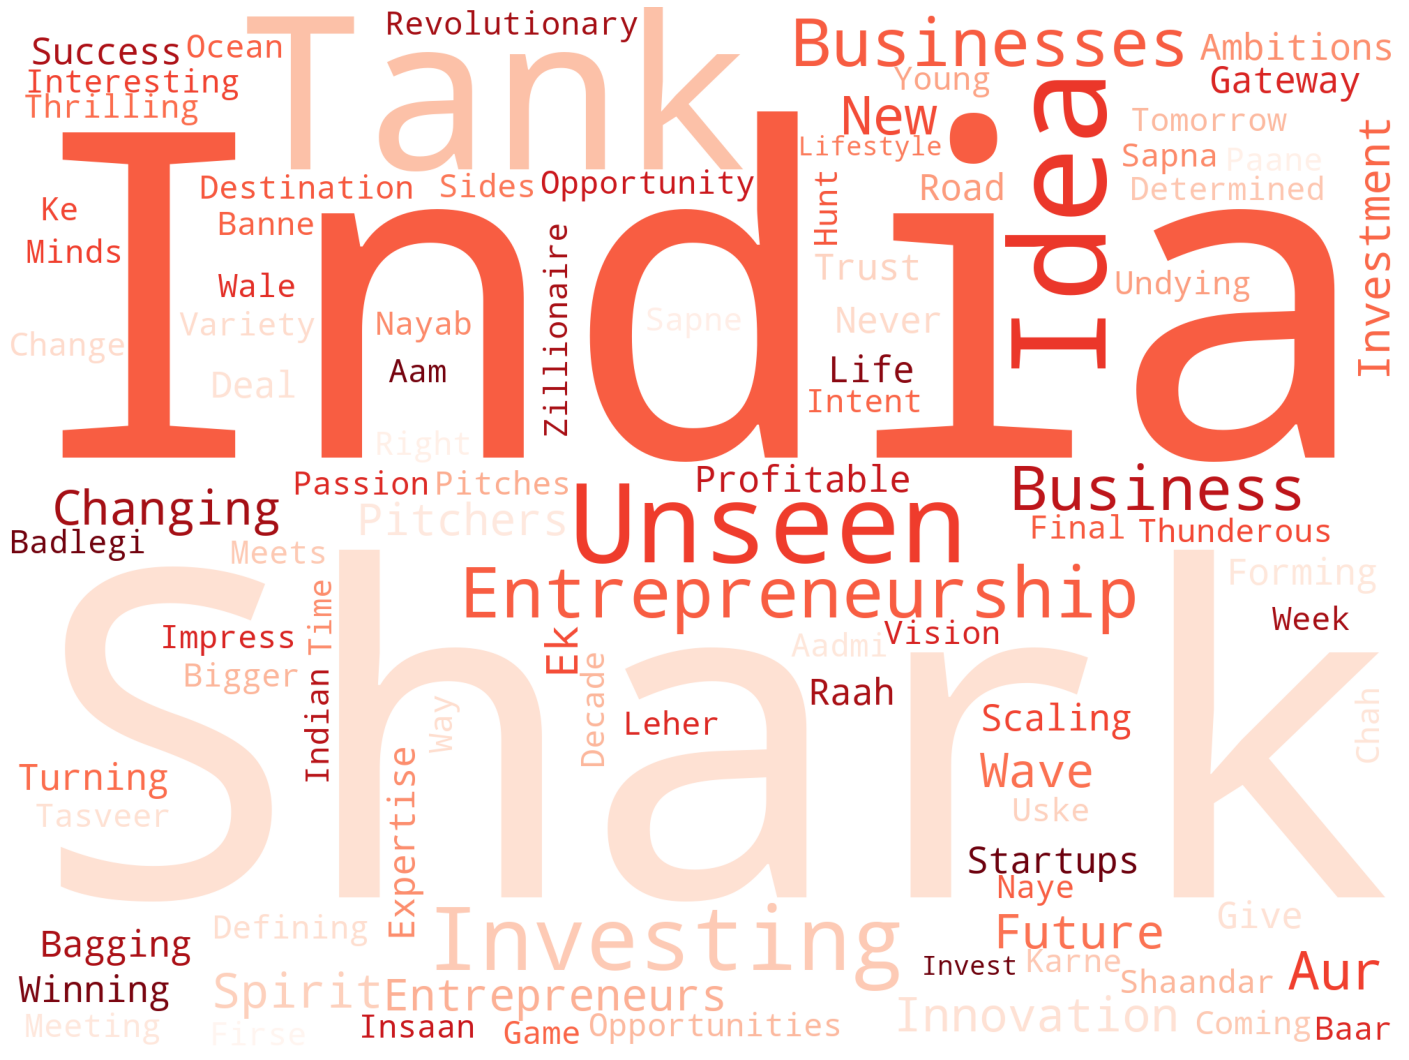

In [5]:
# Word cloud based on episode titles
text = " Shark Tank India ".join(cat for cat in shark_tank.loc[shark_tank['Episode Title'].notnull()]['Episode Title'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ko"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='white', colormap='Reds', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
shark_tank.head(5)

Season Number  Episode Number                Episode Title  Pitch Number  \
0              1               1  Badlegi Business Ki Tasveer             1   
1              1               1  Badlegi Business Ki Tasveer             2   
2              1               1  Badlegi Business Ki Tasveer             3   
3              1               2      Insaan, Ideas Aur Sapne             4   
4              1               2      Insaan, Ideas Aur Sapne             5   

          Startup Name             Industry  \
0       BluePine Foods                 Food   
1        Booz Scooters  Electrical Vehicles   
2  Heart up my Sleeves       Beauty/Fashion   
3           Tagz Foods                 Food   
4       Head and Heart            Education   

                            Business Description  \
0                                   Frozen Momos   
1  Renting e-bike for mobility in private spaces   
2                             Detachable Sleeves   
3                    Healthy Potato Chips Snacks   
4                       Brain Development Course   

                 Company Website  Number of Presenters  Male Presenters  \
0     https://bluepinefoods.com/                     3              2.0   
1        https://www.boozup.net/                     1              1.0   
2  https://heartupmysleeves.com/                     1              NaN   
3         https://tagzfoods.com/                     2              2.0   
4             https://thehnh.in/                     4              1.0   

   Female Presenters  Transgender Presenters  Couple Presenters  \
0                1.0                     NaN                0.0   
1                NaN                     NaN                0.0   
2                1.0                     NaN                0.0   
3                NaN                     NaN                0.0   
4                3.0                     NaN                1.0   

  Pitchers Average Age  Started in Pitchers City Pitchers State  \
0               Middle      2016.0         Delhi          Delhi   
1                Young      2017.0     Ahmedabad        Gujarat   
2                Young      2021.0         Delhi          Delhi   
3               Middle      2019.0     Bangalore      Karnataka   
4               Middle      2015.0           NaN         Punjab   

   Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  \
0            95.0       800000.0           NaN         NaN   
1             4.0        40000.0           NaN         NaN   
2             NaN       200000.0           NaN         NaN   
3           700.0            NaN          48.0         NaN   
4            30.0            NaN           NaN         NaN   

   Original Ask Amount  Original Ask Equity  Valuation Requested  \
0                 50.0                  5.0               1000.0   
1                 40.0                 15.0                267.0   
2                 25.0                 10.0                250.0   
3                 70.0                  1.0               7000.0   
4                 50.0                  5.0               1000.0   

   Received Offer  ...  Number of sharks in deal  Ashneer Investment Amount  \
0             1.0  ...                       3.0                       25.0   
1             1.0  ...                       2.0                       20.0   
2             1.0  ...                       2.0                        0.0   
3             1.0  ...                       1.0                       70.0   
4             0.0  ...                       NaN                        NaN   

   Ashneer Investment Equity  Ashneer Debt Amount  Namita Investment Amount  \
0                       5.33                  NaN                       0.0   
1                      25.00                  NaN                       0.0   
2                       0.00                  NaN                       0.0   
3                       2.75                  NaN                       0.0   
4                      

In [7]:
shark_tank.tail(10).T

183  \
Season Number                                       2   
Episode Number                                     11   
Episode Title                 Investing The Right Way   
Pitch Number                                      184   
Startup Name                               Daily Dump   
Industry                                Manufacturing   
Business Description                     Compost Bins   
Company Website            https://www.dailydump.org/   
Number of Presenters                                2   
Male Presenters                                   1.0   
Female Presenters                                 1.0   
Transgender Presenters                            NaN   
Couple Presenters                                 0.0   
Pitchers Average Age                           Middle   
Started in                                     2006.0   
Pitchers City                               Bangalore   
Pitchers State                              Karnataka   
Yearly Revenue                                    NaN   
Monthly Sales                                     NaN   
Gross Margin                                      NaN   
Net Margin                                        NaN   
Original Ask Amount                              80.0   
Original Ask Equity                               4.0   
Valuation Requested                            2000.0   
Received Offer                                    1.0   
Accepted Offer                                    1.0   
Total Deal Amount                                30.0   
Total Deal Equity                                 4.0   
Total Deal Debt                                  50.0   
Debt Interest                                    10.0   
Valuation Offered                               750.0   
Number of sharks in deal                          1.0   
Ashneer Investment Amount                         NaN   
Ashneer Investment Equity                         NaN   
Ashneer Debt Amount                               NaN   
Namita Investment Amount                         30.0   
Namita Investment Equity                          4.0   
Namita Debt Amount                               50.0   
Anupam Investment Amount                          NaN   
Anupam Investment Equity                          NaN   
Anupam Debt Amount                                NaN   
Vineeta Investment Amount                         NaN   
Vineeta Investment Equity                         NaN   
Vineeta Debt Amount                               NaN   
Aman Investment Amount                            NaN   
Aman Investment Equity                            NaN   
Aman Debt Amount                                  NaN   
Peyush Investment Amount                          NaN   
Peyush Investment Equity                          NaN   
Peyush Debt Amount                                NaN   
Ghazal Investment Amount                          NaN   
Ghazal Investment Equity                          NaN   
Ghazal Debt Amount                                NaN   
Amit Investment Amount                            NaN   
Amit Investment Equity                            NaN   
Amit Debt Amount                                  NaN   

                                                   184  \
Season Number                                        2   
Episode Number                                      12   
Episode Title               Pitchers Ki Undying Spirit   
Pitch Number                                       185   
Startup Name                                 GharSoaps   
Industry                                Beauty/Fashion   
Business Description                Pure Organic Soaps   
Company Website            https://www.gharsoaps.shop/   
Number of Presenters                                 2   
Male Presenters                                    2.0   
Female Presenters                                  NaN   
Transgender Presenters                             NaN   
Couple Presenters                             

In [8]:
shark_tank['Male Presenters'] = shark_tank['Male Presenters'].astype(pd.Int32Dtype())
shark_tank['Female Presenters'] = shark_tank['Female Presenters'].astype(pd.Int32Dtype())
shark_tank['Transgender Presenters'] = shark_tank['Transgender Presenters'].astype(pd.Int32Dtype())
shark_tank['Started in'] = shark_tank['Started in'].astype(pd.Int32Dtype())
shark_tank['Yearly Revenue'] = shark_tank['Yearly Revenue'].astype(pd.Int32Dtype())
shark_tank['Monthly Sales'] = shark_tank['Monthly Sales'].astype(pd.Int32Dtype())

In [9]:
shark_tank.sample(10)

Season Number  Episode Number                        Episode Title  \
107              1              33                  Life-Changing Ideas   
192              2              14                                  NaN   
17               1               6                  New Week, New Ideas   
97               1              30                  Sharks Ki Expertise   
119              1              36          Gateway To Shark Tank India   
116              1              35                The Final Destination   
102              1              31             Entrepreneurship Ki Raah   
136              1               0                               Unseen   
77               1              24  A Decade Of Indian Entrepreneurship   
59               1              19   Forming An Idea And Bagging A Deal   

     Pitch Number       Startup Name              Industry  \
107           108  ColourMeMad - CMM        Beauty/Fashion   
192           193          Econiture  Furnishing/Household   
17             18             Hecoll        Beauty/Fashion   
97             98   Shades of Spring              Services   
119           120        FrenchCrown        Beauty/Fashion   
116           117              Woloo            Technology   
102           103             Astrix         Manufacturing   
136           137         Gizmoswala         Entertainment   
77             78        KG Agrotech              Hardware   
59             60            WeSTOCK           Animal/Pets   

                                  Business Description  \
107                                            Insoles   
192                                                NaN   
17   Pollution Resistant Fabric - Healthy Cover For...   
97                                             Flowers   
119                                            Clothes   
116                                    Washroom Finder   
102                                 Smart Locks Qtouch   
136                                 Sex toys and games   
77                            Agricultural Innovations   
59   Brainwired Livestock health monitoring AI pets...   

                        Company Website  Number of Presenters  \
107          https://yourfootdoctor.in/                     2   
192          https://www.econiture.com/                     4   
17                  https://hecoll.com/                     1   
97           https://shadesofspring.in/                     2   
119             https://frenchcrown.in/                     2   
116                   https://woloo.in/                     3   
102  https://www.astrixengineering.com/                     2   
136         https://www.gizmoswala.com/                     3   
77                                  NaN                     2   
59           https://www.brainwired.in/                     2   

     Male Presenters  Female Presenters  Transgender Presenters  \
107                1                  1                    <NA>   
192                4               <NA>                    <NA>   
17              <NA>                  1                    <NA>   
97                 1                  1                    <NA>   
119                2               <NA>                    <NA>   
116                1                  2                    <NA>   
102                1                  1                    <NA>   
136                2                  1                    <NA>   
77                 2               <NA>                    <NA>   
59                 2               <NA>                    <NA>   

     Couple Presenters Pitchers Average Age  Started in Pitchers City  \
107                1.0               Middle        2017        Mumbai   
192                NaN                  NaN        <NA>           NaN   
17                 0.0               Middle        2019     Hyderabad   
97                 1.0                Young        2019     Bangalore   
119                0.0               M

In [10]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              193 non-null    int64  
 1   Episode Number             193 non-null    int64  
 2   Episode Title              190 non-null    object 
 3   Pitch Number               193 non-null    int64  
 4   Startup Name               193 non-null    object 
 5   Industry                   193 non-null    object 
 6   Business Description       190 non-null    object 
 7   Company Website            188 non-null    object 
 8   Number of Presenters       193 non-null    int64  
 9   Male Presenters            166 non-null    Int32  
 10  Female Presenters          100 non-null    Int32  
 11  Transgender Presenters     2 non-null      Int32  
 12  Couple Presenters          186 non-null    float64
 13  Pitchers Average Age       191 non-null    object 

In [11]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [12]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 2
Number of unique values in Episode Number - 37
Number of unique values in Episode Title - 50
Number of unique values in Pitch Number - 193
Number of unique values in Startup Name - 193
Number of unique values in Industry - 14
Number of unique values in Business Description - 190
Number of unique values in Company Website - 188
Number of unique values in Number of Presenters - 5
Number of unique values in Male Presenters - 5
Number of unique values in Female Presenters - 3
Number of unique values in Transgender Presenters - 1
Number of unique values in Couple Presenters - 2
Number of unique values in Pitchers Average Age - 3
Number of unique values in Started in - 13
Number of unique values in Pitchers City - 47
Number of unique values in Pitchers State - 22
Number of unique values in Yearly Revenue - 45
Number of unique values in Monthly Sales - 56
Number of unique values in Gross Margin - 25
Number of unique values in Net Margin - 0
Number 

## 🏦 Season one/two of SHARK TANK INDIA was broadcasted in SonyLiv OTT and Sony TV

In [13]:
shark_tank_season1 = shark_tank.loc[shark_tank['Season Number']==1]
shark_tank_season1_without_unseen = shark_tank.loc[(shark_tank['Season Number']==1) & (shark_tank['Episode Number']!=0)]
shark_tank_season2 = shark_tank.loc[shark_tank['Season Number']==2]

In [14]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")
print("In Season 1, in", shark_tank_season1['Episode Number'].max(), "episodes, there were", shark_tank_season1.loc[shark_tank_season1['Episode Number']!=0]['Startup Name'].count(), "(real) pitches and", shark_tank_season1.loc[shark_tank_season1['Episode Number']==0]['Startup Name'].count(),"unseen pitches\n")
print("In Season 2, in", shark_tank_season2['Episode Number'].max(), "episodes, there were", shark_tank_season2.loc[shark_tank_season2['Episode Number']!=0]['Startup Name'].count(), "pitches\n")

2 seasons 

193 startup companies came for pitching 

In Season 1, in 36 episodes, there were 122 (real) pitches and 30 unseen pitches

In Season 2, in 14 episodes, there were 41 pitches



In [15]:
# There were 3 or 4 pitches in a each episode
print(shark_tank.loc[shark_tank['Episode Number']!=0][['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[2 3 4]


In [16]:
# Types of industries, came for investments, in season 1
print(shark_tank_season1['Industry'].value_counts())

tmp = shark_tank_season1['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank India Season 1</b>", template='simple_white', text=tmp)
fig.show()

Food                   42
Beauty/Fashion         27
Manufacturing          21
Services               14
Technology             12
Education               9
Medical                 9
Electrical Vehicles     5
Animal/Pets             4
Electronics             3
Hardware                3
Sports                  2
Entertainment           1
Name: Industry, dtype: int64


In [17]:
# Types of industries, came for investments, in season 2
print(shark_tank_season2['Industry'].value_counts())

tmp = shark_tank_season2['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank India Season 2</b>", template='simple_white', text=tmp)
fig.show()

Beauty/Fashion          12
Food                     9
Manufacturing            5
Technology               4
Services                 2
Medical                  2
Furnishing/Household     2
Sports                   2
Electronics              1
Entertainment            1
Electrical Vehicles      1
Name: Industry, dtype: int64


In [18]:
# Gender wise
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")
print("")
print("Total male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")
print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")
print("Total transgender pitchers -", int(shark_tank['Transgender Presenters'].sum()), "\n")
print("")
print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("")
print("COVID entrepreneurs/startups - ", shark_tank.loc[shark_tank['Started in']==2020]['Startup Name'].count(), sep='')

Total pitchers - 401 


Total male pitchers - 282 

Total female pitchers - 117 

Total transgender pitchers - 2 


Male entrepreneurs percentage - 70.0%

Female entrepreneurs percentage - 29.0%

Couple entrepreneurs percentage - 10.0%


COVID entrepreneurs/startups - 20


### 💹 67% companies received offers and 33% startups could not convince Sharks to invest

1.0    127
0.0     63
Name: Received Offer, dtype: int64 

1.0    67%
0.0    33%
Name: Received Offer, dtype: object


<AxesSubplot:ylabel='Received Offer'>

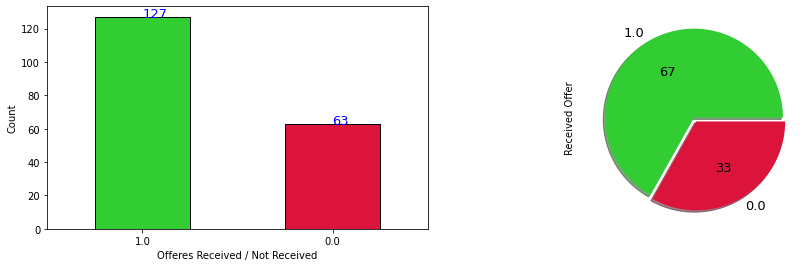

In [19]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Received Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offeres Received / Not Received")
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Received Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Received Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)

# 88 companies received investments and 33 startups could not get offers

### ＄ 77% companies accepted offers and 23% startups didn't accept Sharks offer

1.0    97
0.0    29
Name: Accepted Offer, dtype: int64 

1.0    77%
0.0    23%
Name: Accepted Offer, dtype: object


<AxesSubplot:ylabel='Accepted Offer'>

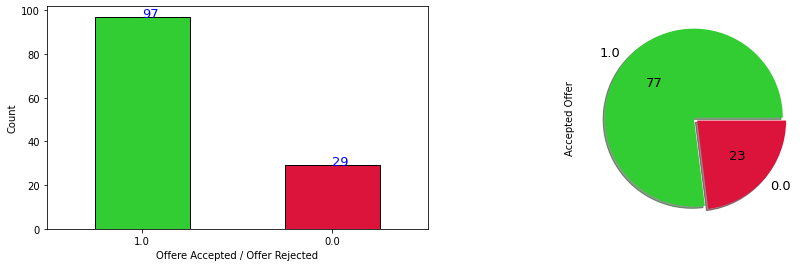

In [20]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15, 9))
ax1 = plt.subplot(221)
shark_tank["Accepted Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offere Accepted / Offer Rejected")
plt.ylabel("Count")
plt.xticks(rotation = 0)
for x,y in enumerate(shark_tank["Accepted Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Accepted Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)

# 67 companies accepted investments they got and 21 startup companies did not accept offer

## ❗ Shark Tank India data set Visualizations/infographics in Tableau Public —
### https://public.tableau.com/app/profile/satya.thirumani/viz/SharkTankIndia_16448181343920/SharkTankIndiaStory

In [21]:
IFrame('https://public.tableau.com/views/SharkTankIndia_16448181343920/SharkTankIndiaStory', width=1100, height=1000)

In [22]:
# Maximum amount requested
print("Rs.", round(shark_tank["Original Ask Amount"].max()/100), "crores")

Rs. 300 crores


In [23]:
# Least amount requested
print("Rs.", round(shark_tank["Original Ask Amount"].min()*100000))

Rs. 5


In [24]:
# Offers rejected by pitchers/startup companies
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Industry","Original Ask Amount","Original Ask Equity"]]

Startup Name        Industry  Original Ask Amount  \
6            qZense Labs            Food                100.0   
19              Torch-it       Education                 75.0   
21           LaKheerDeli            Food                 50.0   
27        Kabira Handmad            Food                100.0   
41    Morriko Pure Foods            Food                100.0   
55     India Hemp and Co            Food                 50.0   
60            Keto India            Food                150.0   
70             Moonshine            Food                 80.0   
71               Falhari            Food                 50.0   
73           UrbanMonkey  Beauty/Fashion                100.0   
74        Guardian Gears   Manufacturing                 30.0   
81                Alpino            Food                150.0   
87   Aliste Technologies      Technology                 60.0   
93            PDD Falcon   Manufacturing                 75.0   
94             PlayBoxTV        Services                100.0   
104       ExperentialEtc      Technology                200.0   
106          C3 Med-Tech         Medical                 35.0   
113        Green Protein            Food                 60.0   
116                Woloo      Technology                 50.0   
119          FrenchCrown  Beauty/Fashion                150.0   
121             Devnagri      Technology                100.0   
131            Scintiglo         Medical                 75.0   
135            UrbanNaps        Services                 50.0   
138             Picsniff      Technology                 55.0   
149              Artment  Beauty/Fashion                170.0   
151                 Eume  Beauty/Fashion                150.0   
158           ATMOSPHERE            Food                 75.0   
165            Flatheads  Beauty/Fashion                 75.0   
189              Diabexy            Food                150.0   

     Original Ask Equity  
6                   0.25  
19                  1.00  
21                  7.50  
27                  5.00  
41                  3.00  
55                  4.00  
60                  1.25  
70                  0.50  
71                  2.00  
73                  1.00  
74                  5.00  
81                  2.00  
87                  5.00  
93                  3.00  
94                  3.50  
104                 4.00  
106                 6.00  
113                 2.00  
116                 4.00  
119                 0.33  
121                 1.00  
131                 1.00  
135                 4.00  
138                 1.00  
149                 2.50  
151                 2.00  
158                 3.00  
165                 3.00  
189                 1.00

In [25]:
# Sum of investment amount asked by all startup companies, in Shark Tank, in India
print(format_currency(shark_tank['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹431.03 crores


In [26]:
# Sum of amount invested by all sharks, in Shark Tank India
print(format_currency(shark_tank['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹57.95 crores


In [27]:
# Sum of loan/debt amount given by all sharks, in India Shark Tank
print(format_currency(shark_tank['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹8.11 crores


In [28]:
# Top 20 investments, as per total investment/deal amount (in lakhs)
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Amount', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount (in lakhs)", text=tmpdf['Total Deal Amount'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
AasVidyalaya           150.0
Stage                  150.0
Annie                  105.0
GearHeadMotors         100.0
Get-A-Whey             100.0
Hammer Lifestyle       100.0
Haqdarshak             100.0
Hoovu                  100.0
HumpyA2                100.0
IN A CAN               100.0
Insurance Samadhan     100.0
Janitri                100.0
Proxgy                 100.0
Raising Superstars     100.0
Revamp Moto            100.0
Skippi Ice Pops        100.0
Sunfox Technologies    100.0
The Renal Project      100.0
The Yarn Bazaar        100.0
WatchoutWearables      100.0
Name: Total Deal Amount, dtype: float64


In [29]:
# Top 10 investments, as per total equity/shares percentage
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
Sid07 Designs          75.00
Booz Scooters          50.00
Isak Fragrances        50.00
Hammer Lifestyle       40.00
KG Agrotech            40.00
TheSassBar             35.00
Vivalyf Innovations    33.33
Gold Safe Solutions    30.00
Heart up my Sleeves    30.00
Jain Shikanji          30.00
Name: Total Deal Equity, dtype: float64


In [30]:
# Top 8 investments, as per total debt/loan amount
print(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(8))

tmpdf = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:8]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per Debt amount (in lakhs)", text=tmpdf['Total Deal Debt'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
Stage                150.0
WatchoutWearables    100.0
Otua                  99.0
AyuSynk               50.0
Daily Dump            50.0
Freebowler            50.0
Namhya Foods          50.0
StoreMyGoods          50.0
Name: Total Deal Debt, dtype: float64


In [31]:
# Startups who got Debt/loan amount
shark_tank.loc[shark_tank['Total Deal Debt'] > 0][["Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity","Total Deal Debt"]]

Startup Name  Original Ask Amount  Total Deal Amount  \
8                 NOCD                 50.0               20.0   
44                 PNT                 50.0               25.0   
46        Bamboo India                 80.0               50.0   
56                Otua                100.0                1.0   
62     The State Plate                 65.0               40.0   
66       Sid07 Designs                 47.0               25.0   
72        Namhya Foods                100.0               50.0   
77         KG Agrotech                 30.0               10.0   
120       StoreMyGoods                100.0               50.0   
156  WatchoutWearables                200.0              100.0   
157              SoupX                 75.0               50.0   
159              Stage                300.0              150.0   
163        Brandsdaddy                 70.0               35.0   
172            AyuSynk                100.0               50.0   
180         Freebowler                 75.0               25.0   
183         Daily Dump                 80.0               30.0   

     Total Deal Equity  Total Deal Debt  
8                 15.0             30.0  
44                25.0             25.0  
46                 3.5             30.0  
56                 1.0             99.0  
62                 3.0             25.0  
66                75.0             22.0  
72                10.0             50.0  
77                40.0             20.0  
120                4.0             50.0  
156               10.0            100.0  
157               18.0             25.0  
159                0.6            150.0  
163                5.0             35.0  
172                3.5             50.0  
180                7.5             50.0  
183                4.0             50.0

## 💰 Which shark invested most ?

In [32]:
# Maximum Investment - as per Investment Amount
print("Aman invested -", max(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100, shark_tank['Amit Investment Amount'].sum()/100), "crores")

Aman invested - 13.340700159999999 crores


In [33]:
# Minimum Investment - as per Investment Amount
print("Amit invested -", min(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100, shark_tank['Amit Investment Amount'].sum()/100), "crores")

Amit invested - 0.5875 crores


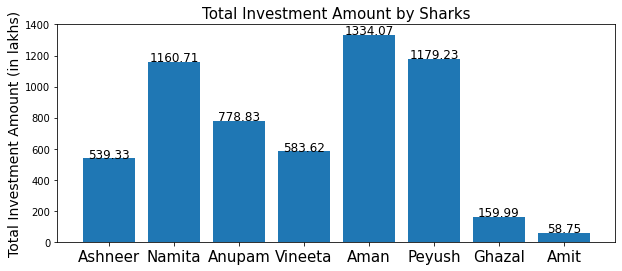

In [34]:
# Amount received by sharks
Amount = [shark_tank['Ashneer Investment Amount'].sum(), shark_tank['Namita Investment Amount'].sum(), shark_tank['Anupam Investment Amount'].sum(), shark_tank['Vineeta Investment Amount'].sum(),
    shark_tank['Aman Investment Amount'].sum(), shark_tank['Peyush Investment Amount'].sum(), shark_tank['Ghazal Investment Amount'].sum(), shark_tank['Amit Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit']
df = {'Name':name, 'Total Amount':Amount }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=14)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks", fontsize=15)
plt.show()

In [35]:
# Maximum Equity - who received maximum shares
print("Peyush got equity of -", max(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum(), shark_tank['Amit Investment Equity'].sum()), "% in different companies")

Peyush got equity of - 354.166 % in different companies


In [36]:
# Minimum Equity - who received least amount of shares
print("Amit got equity of -", min(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum(), shark_tank['Amit Investment Equity'].sum()), "% in different companies")

Amit got equity of - 23.75 % in different companies


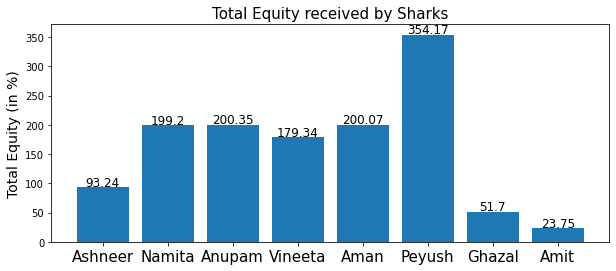

In [37]:
# Equity received by sharks
Equity = [shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum(), shark_tank['Amit Investment Equity'].sum()]
df = {'Name':name, 'Total Equity':Equity }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (in %)",fontsize=14)
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks", fontsize=15)
plt.show()

In [38]:
# Maximum Investment - as per Debt/loaned Amount
print("Peyush gave loan of -", max(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100, shark_tank['Amit Debt Amount'].sum()/100), "crores")

Peyush gave loan of - 2.6 crores


In [39]:
# Minimum Investment - as per Debt/loaned Amount - Ghazal has not given any loan
print("Ghazal & Amit gave loan of -", min(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100, shark_tank['Amit Debt Amount'].sum()/100), "crores")

Ghazal & Amit gave loan of - 0.0 crores


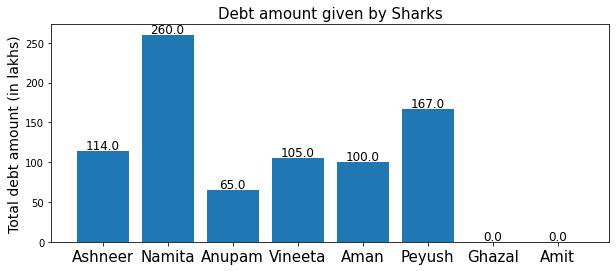

In [40]:
# Investment based on the  Debt/loaned Amount
debt = [shark_tank['Ashneer Debt Amount'].sum(), shark_tank['Namita Debt Amount'].sum(), shark_tank['Anupam Debt Amount'].sum(), shark_tank['Vineeta Debt Amount'].sum(),
    shark_tank['Aman Debt Amount'].sum(), shark_tank['Peyush Debt Amount'].sum(), shark_tank['Ghazal Debt Amount'].sum(), shark_tank['Amit Debt Amount'].sum()]
df = {'Name':name, 'Total debt':debt }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total debt'])
plt.xticks(fontsize=15)
plt.ylabel("Total debt amount (in lakhs)",fontsize=14)
for index,d in enumerate(debt):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Debt amount given by Sharks", fontsize=15)
plt.show()

## 📊 BIGG BOSS Dataset https://www.kaggle.com/datasets/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

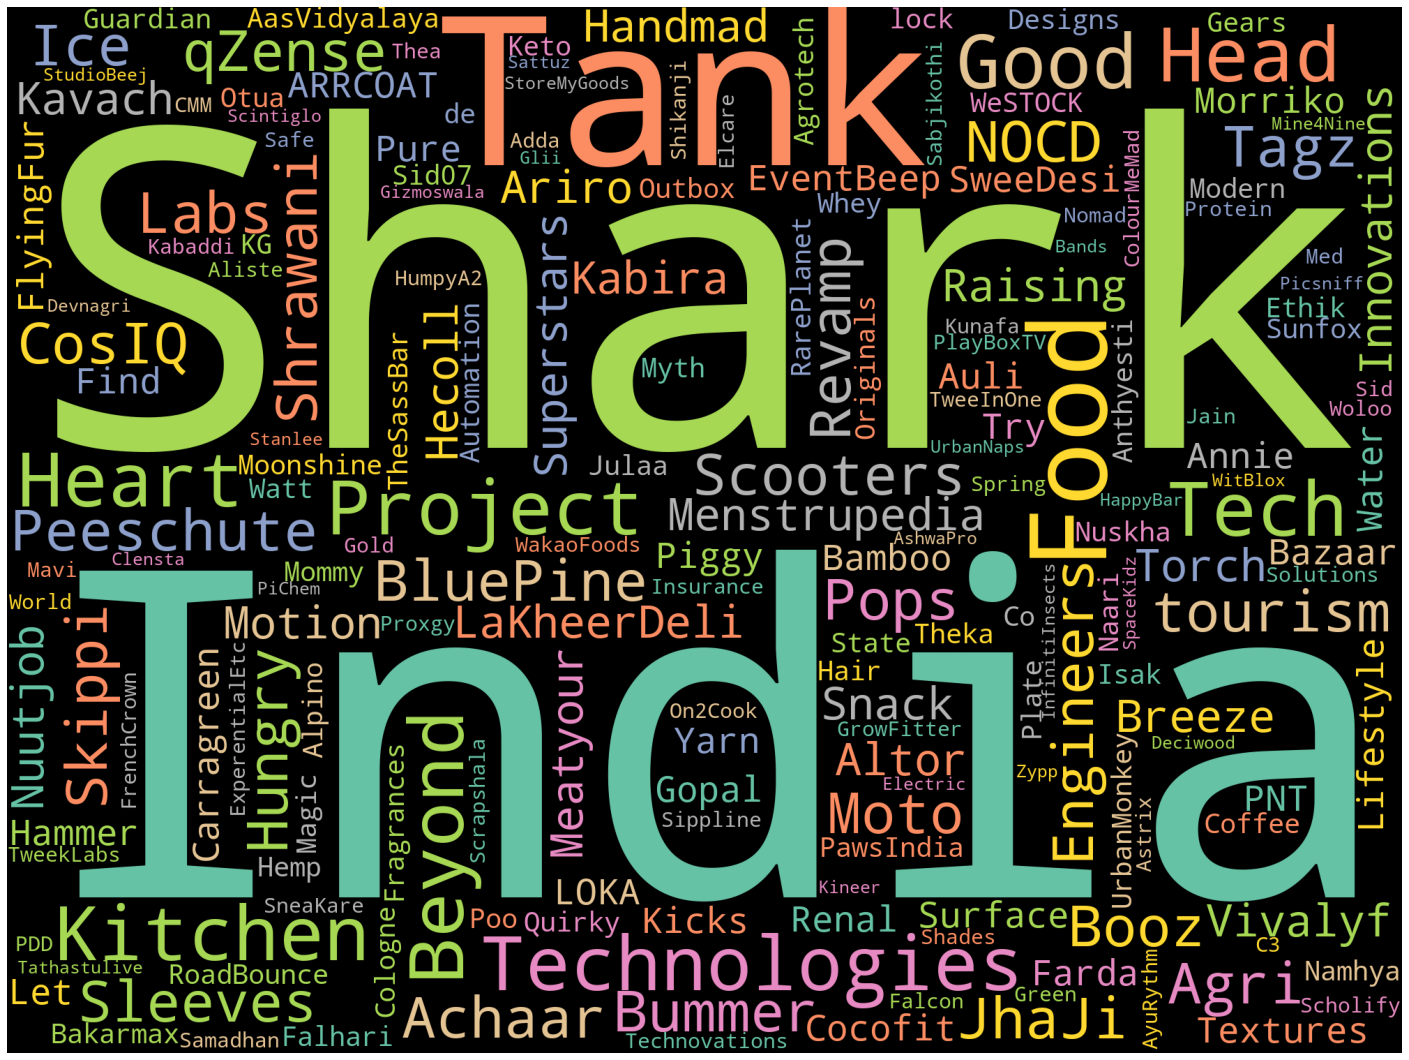

In [41]:
# Word cloud based on Startup Names, in season 1
text = " Shark Tank India ".join(cat for cat in shark_tank_season1['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

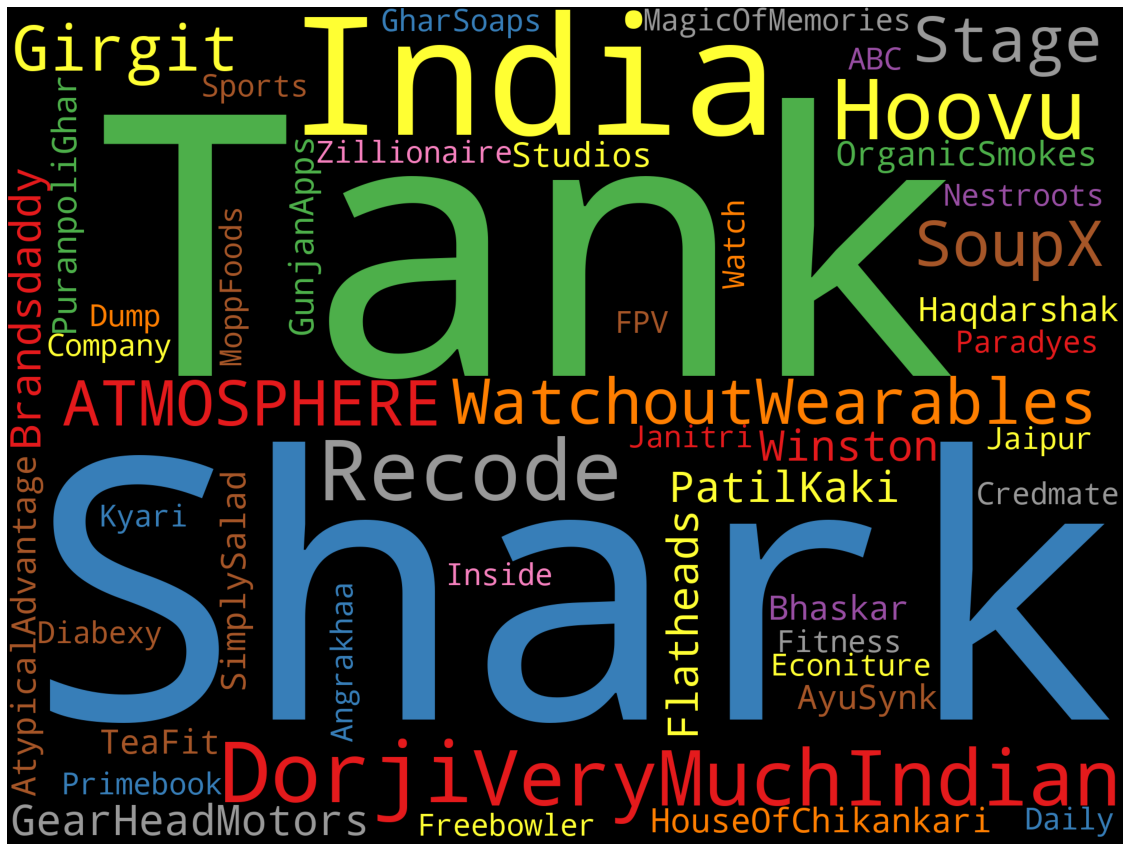

In [42]:
# Word cloud based on Startup Names, in season 2
text = " Shark Tank India ".join(cat for cat in shark_tank_season2['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔥 Ashneer Grover's Investments

Total investments by Ashneer 21
Investment amount by Ashneer 5.39 crores
Equity received by Ashneer 93.24 % in different companies
Debt/loan amount by Ashneer 1.14 crores

---------------------------------------------------------------------------
         Startup Name            Industry  Ashneer Investment Amount
       BluePine Foods                Food                      25.00
        Booz Scooters Electrical Vehicles                      20.00
           Tagz Foods                Food                      70.00
      Skippi Ice Pops                Food                      20.00
   Raising Superstars           Education                      50.00
         Beyond Snack                Food                      25.00
        Motion Breeze Electrical Vehicles                      30.00
            EventBeep           Education                      10.00
      The Yarn Bazaar       Manufacturing                      25.00
         Bamboo India       Manufacturing                     

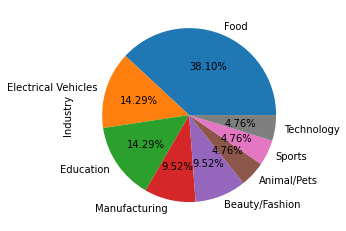

In [43]:
print("Total investments by Ashneer", shark_tank[shark_tank['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAshneer industry wise investments\n")
print(shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎆 Namita Thapar's Investments

Total investments by Namita 37
Investment amount by Namita 11.61 crores
Equity received by Namita 199.2 % in different companies
Debt/loan amount by Namita 2.6 crores

---------------------------------------------------------------------------
         Startup Name             Industry  Namita Investment Amount
         JhaJi Achaar                 Food                 28.300000
               Bummer       Beauty/Fashion                 37.500000
      Skippi Ice Pops                 Food                 20.000000
         Menstrupedia            Education                 50.000000
                Altor        Manufacturing                 25.000000
              Nuutjob       Beauty/Fashion                  8.330000
                Farda       Beauty/Fashion                 15.000000
                 Auli       Beauty/Fashion                 75.000000
                Annie            Education                 35.000000
    The Renal Project              Medical                 50.0000

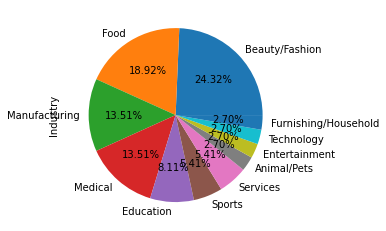

In [44]:
print("Total investments by Namita", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nNamita industry wise investments\n")
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## ㊂ Anupam Mittal's Investments

Total investments by Anupam 31
Investment amount by Anupam 7.79 crores
Equity received by Anupam 200.35 % in different companies
Debt/loan amount by Anupam 0.65 crores

---------------------------------------------------------------------------
            Startup Name            Industry  Anupam Investment Amount
     Heart up my Sleeves      Beauty/Fashion                 12.500000
                   CosIQ      Beauty/Fashion                 25.000000
             Revamp Moto Electrical Vehicles                 50.000000
         Skippi Ice Pops                Food                 20.000000
                  Kavach           Education                  2.500000
     Vivalyf Innovations             Medical                 28.000000
                Meatyour                Food                 10.000000
ARRCOAT Surface Textures       Manufacturing                 50.000000
                    LOKA          Technology                 13.330000
                   Annie           Education 

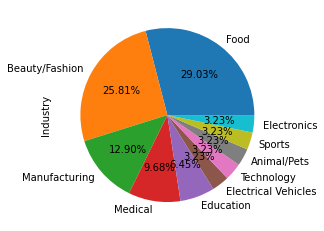

In [45]:
print("Total investments by Anupam", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAnupam industry wise investments\n")
print(shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎇 Vineeta Singh's Investments
#### Vineeta's portfolio has 52% Food industry and 23% Beauty/Fashion industry

Total investments by Vineeta 24
Investment amount by Vineeta 5.84 crores
Equity received by Vineeta 179.34 % in different companies
Debt/loan amount by Vineeta 1.05 crores

---------------------------------------------------------------------------
       Startup Name            Industry  Vineeta Investment Amount
     BluePine Foods                Food                      25.00
      Booz Scooters Electrical Vehicles                      20.00
Heart up my Sleeves      Beauty/Fashion                      12.50
               NOCD                Food                      20.00
              CosIQ      Beauty/Fashion                      25.00
       JhaJi Achaar                Food                      28.30
    Skippi Ice Pops                Food                      20.00
         Get-A-Whey                Food                      33.33
   The Quirky Naari      Beauty/Fashion                      17.50
Sunfox Technologies             Medical                      20.00
            Hu

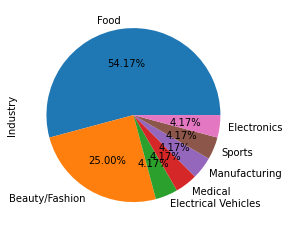

In [46]:
print("Total investments by Vineeta", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nVineeta industry wise investments\n")
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🚀 Aman Gupta's Investments

Total investments by Aman 43
Investment amount by Aman 13.34 crores
Equity received by Aman 200.07 % in different companies
Debt/loan amount by Aman 1.0 crores

---------------------------------------------------------------------------
         Startup Name            Industry  Aman Investment Amount
       BluePine Foods                Food               25.000000
            Peeschute      Beauty/Fashion               75.000000
               Bummer      Beauty/Fashion               37.500000
          Revamp Moto Electrical Vehicles               50.000000
      Skippi Ice Pops                Food               20.000000
   Raising Superstars           Education               50.000000
               Kavach           Education                2.500000
         Beyond Snack                Food               25.000000
                Altor       Manufacturing               25.000000
                Ariro       Manufacturing               25.000000
              Nuutjob      Beauty/Fas

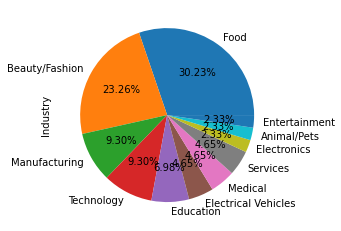

In [47]:
print("Total investments by Aman", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAman industry wise investments\n")
print(shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎾 Peyush Bansal's Investments

Total investments by Peyush 40
Investment amount by Peyush 11.79 crores
Equity received by Peyush 354.17 % in different companies
Debt/loan amount by Peyush 1.67 crores

---------------------------------------------------------------------------
         Startup Name            Industry  Peyush Investment Amount
  Vivalyf Innovations             Medical                 28.000000
                Ariro       Manufacturing                 25.000000
              Nuutjob      Beauty/Fashion                  8.330000
             Meatyour                Food                 10.000000
            EventBeep           Education                 10.000000
                 LOKA          Technology                 13.330000
                Annie           Education                 35.000000
           Carragreen       Manufacturing                 25.000000
      The Yarn Bazaar       Manufacturing                 25.000000
                  PNT          Technology                 25.000000
Find Y

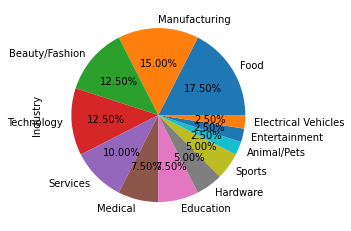

In [48]:
print("Total investments by Peyush", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nPeyush industry wise investments\n")
print(shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## 🎯 Ghazal Alagh's Investments

Total investments by Ghazal  8
Investment amount by Ghazal 1.6 crores
Equity received by Ghazal 51.7 % in different companies
Debt/loan amount by Ghazal 0.0 crores

---------------------------------------------------------------------------
       Startup Name       Industry  Ghazal Investment Amount
         TheSassBar Beauty/Fashion                 25.000000
Sunfox Technologies        Medical                 20.000000
 Watt Technovations        Medical                  0.000253
            HumpyA2           Food                 33.330000
Gold Safe Solutions  Manufacturing                 16.660000
         WakaoFoods           Food                 25.000000
 Nomad Food Project           Food                 10.000000
            WitBlox  Manufacturing                 30.000000
---------------------------------------------------------------------------

Ghazal industry wise investments

Food              3
Medical           2
Manufacturing     2
Beauty/Fashion    1
Name: Industry, dty

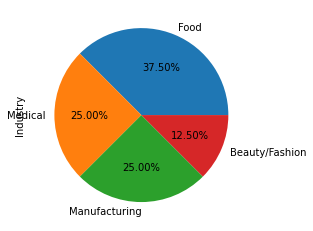

In [49]:
print("Total investments by Ghazal", shark_tank[shark_tank['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nGhazal industry wise investments\n")
print(shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", title="<b>Total equity received by Ghazal (in %) for investment (in lakhs)</b>", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

## ✳️ Amit Jain's Investments

Total investments by Amit  2
Investment amount by Amit 0.59 crores
Equity received by Amit 23.75 % in different companies
Debt/loan amount by Amit 0.0 crores

---------------------------------------------------------------------------
Startup Name       Industry  Amit Investment Amount
  Inside FPV  Manufacturing                   18.75
   Angrakhaa Beauty/Fashion                   40.00
---------------------------------------------------------------------------

Amit industry wise investments

Manufacturing     1
Beauty/Fashion    1
Name: Industry, dtype: int64


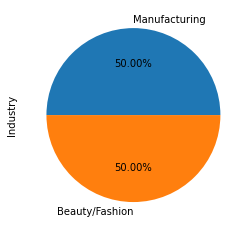

In [50]:
print("Total investments by Amit", shark_tank[shark_tank['Amit Investment Amount']>0][['Amit Investment Amount']].count().to_string()[-2:])
print("Investment amount by Amit", round(shark_tank['Amit Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Amit", round(shark_tank['Amit Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Amit", round(shark_tank['Amit Debt Amount'].sum()/100, 2), "crores\n")

print('-'*75)
print(shark_tank.loc[shark_tank['Amit Investment Amount']>0][["Startup Name","Industry","Amit Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAmit industry wise investments\n")
print(shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Amit Investment Amount']>0] [["Startup Name","Amit Investment Amount","Amit Investment Equity"]].sort_values(by="Amit Investment Equity")
fig = px.bar(tmpdf, x="Amit Investment Equity", y='Amit Investment Amount', color="Startup Name", title="<b>Total equity received by Amit (in %) for investment (in lakhs)</b>", text=tmpdf['Amit Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

2.0    35
1.0    34
3.0    18
4.0     7
5.0     4
Name: Number of sharks in deal, dtype: int64 

2.0    36%
1.0    35%
3.0    18%
4.0     7%
5.0     4%
Name: Number of sharks in deal, dtype: object


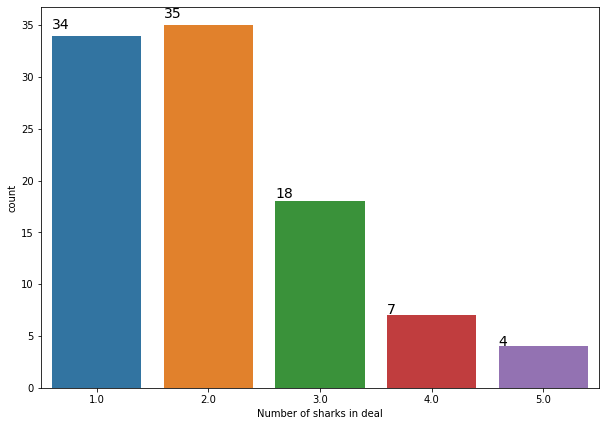

In [51]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [52]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])

             Startup Name  Total Deal Amount  Total Deal Equity
15        Skippi Ice Pops              100.0               15.0
50  Find Your Kicks India               50.0               25.0
64               IN A CAN              100.0               10.0
80    Sunfox Technologies              100.0                6.0


In [53]:
print(shark_tank['Pitchers City'].value_counts(), "\n")

Delhi                 26
Mumbai                26
Bangalore             13
Pune                  13
Ahmedabad             10
Hyderabad              7
Gurgaon                6
Kolkata                6
Jaipur                 5
Ludhiana               4
Chennai                3
Gandhinagar            3
Surat                  3
Noida                  3
Nagpur                 2
Jammu                  2
Indore                 2
Lucknow                2
Thane                  2
Darjeeling             1
Madhubani              1
Goa                    1
Varanasi               1
Bhagalpur              1
Faridabad              1
Modinagar              1
Coimbatore             1
Shimla                 1
Bengaluru              1
Pune, Delhi            1
Mangalore              1
Jamshedpur             1
Bangalore, Kolkata     1
Dehradun               1
Malegaon               1
Mathura                1
Ernakulam              1
Panipat                1
Valsad                 1
Vadodara               1


In [54]:
print(shark_tank['Pitchers State'].value_counts(), "\n")

Maharashtra               47
Delhi                     26
Gujarat                   19
Karnataka                 15
Uttar Pradesh              8
Haryana                    8
West Bengal                7
Telangana                  7
Rajasthan                  6
Punjab                     5
Tamil Nadu                 4
Bihar                      3
Kerala                     2
Madhya Pradesh             2
Jammu & Kashmir            2
Punjab, Delhi              1
Karnataka, West Bengal     1
Uttarakhand                1
Goa                        1
Maharashtra, Delhi         1
Himachal Pradesh           1
Jharkhand                  1
Name: Pitchers State, dtype: int64 



In [55]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(shark_tank.set_index('Pitchers State'))
merged['Original Ask Amount'] = merged['Original Ask Amount'].fillna(0)

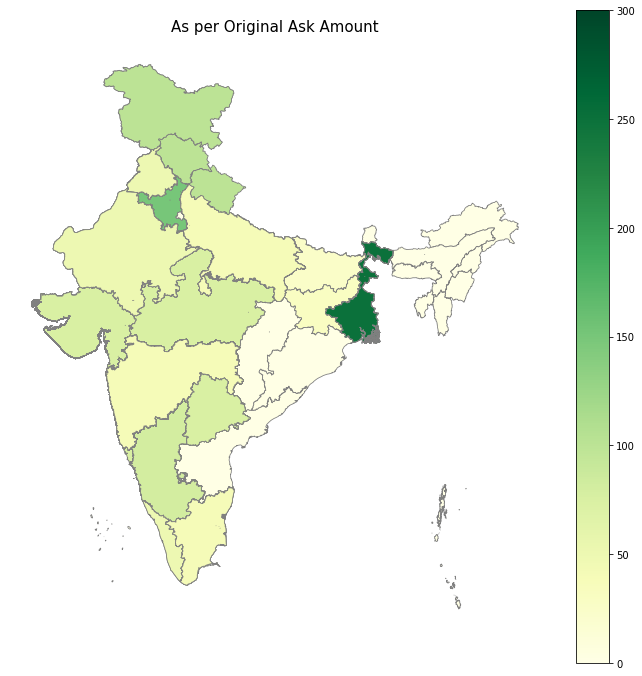

In [56]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('As per Original Ask Amount', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Original Ask Amount', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

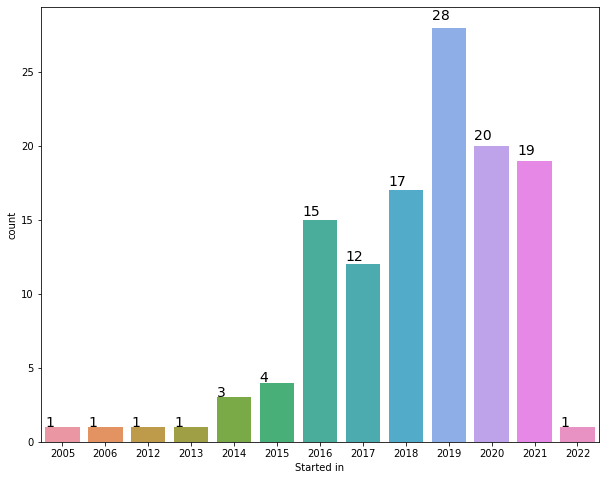

In [57]:
# Startup companies started in year
fig = plt.figure(figsize=(10, 8))
tmp = shark_tank.loc[shark_tank['Started in'].notnull()]
ax = sns.countplot(data = tmp, x = 'Started in')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [58]:
# Few companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name  Original Ask Amount  Total Deal Amount
0      BluePine Foods                 50.0               75.0
10       JhaJi Achaar                 50.0               56.6
15    Skippi Ice Pops                 45.0              100.0
37              Annie                 30.0              105.0
39    The Yarn Bazaar                 50.0              100.0
43   Hammer Lifestyle                 30.0              100.0
59            WeSTOCK                 50.0               60.0
64           IN A CAN                 50.0              100.0
76         TheSassBar                 40.0               50.0
89            HumpyA2                 75.0              100.0
109         TweekLabs                 40.0               60.0
110            Proxgy                 35.0              100.0
118          SneaKare                 20.0               21.0
152             Hoovu                 80.0              100.0
161    GearHeadMotors                 75.0              100.0
178       Zillionaire                 50.0              100.0

In [59]:
# Many companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Ask Equity'] < shark_tank["Total Deal Equity"]][["Startup Name","Original Ask Equity","Total Deal Equity"]]

Startup Name  Original Ask Equity  Total Deal Equity
0          BluePine Foods                  5.0              16.00
1           Booz Scooters                 15.0              50.00
2     Heart up my Sleeves                 10.0              30.00
3              Tagz Foods                  1.0               2.75
7               Peeschute                  4.0               6.00
..                    ...                  ...                ...
181  ABC Sports & Fitness                  2.0              10.00
182             Primebook                  1.5               3.00
184             GharSoaps                  2.0               4.00
187            Inside FPV                  4.0              15.00
188             Angrakhaa                  5.0              20.00

[86 rows x 3 columns]

In [60]:
# Below 3 companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Valuation Offered"]][["Startup Name","Valuation Requested","Valuation Offered"]]

Startup Name  Valuation Requested  Valuation Offered
20               Kavach                 50.0               50.0
22         Beyond Snack               2000.0             2000.0
45              Cocofit                  0.0                0.0
86   Watt Technovations                  0.0                0.0
171     The SimplySalad                300.0              300.0
185             Janitri               4000.0             4000.0

In [61]:
# There is NO company which got more valuation than they pitched, JhaJi Achaar received after the Season (in 2023)
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Valuation Offered"]][["Startup Name","Valuation Requested","Valuation Offered"]]

Startup Name  Valuation Requested  Valuation Offered
10  JhaJi Achaar                500.0             1007.0

In [62]:
# Some companies were on pre-revenue or didn't had any revenue (as of pitching day)
shark_tank.loc[shark_tank['Yearly Revenue'] == 0]

Season Number  Episode Number                      Episode Title  \
24               1               8  Shark Ko Impress Karne Wale Ideas   
42               1              14            Naye Aur Nayab Pitchers   
83               1              26                Revolutionary Ideas   
98               1              30                Sharks Ki Expertise   
100              1              31           Entrepreneurship Ki Raah   
114              1              34                  Scaling Ambitions   
131              1               0                             Unseen   

     Pitch Number      Startup Name             Industry  \
24             25     Motion Breeze  Electrical Vehicles   
42             43   Good Good Piggy           Technology   
83             84  Julaa Automation        Manufacturing   
98             99          Scholify            Education   
100           101        Sabjikothi        Manufacturing   
114           115           On2Cook                 Food   
131           132         Scintiglo              Medical   

                                  Business Description  \
24                           Smart Electric Motorcycle   
42                                  Digital Piggy Bank   
83                                    Automatic Cradle   
98                                Scholarship Platform   
100                      Vegetables Storage SaptKrishi   
114                             Fastest Cooking Device   
131  Diagnostic device for microalbuminuria estimation   

                      Company Website  Number of Presenters  Male Presenters  \
24   https://www.motionautomotive.in/                     4                4   
42         https://goodgoodpiggy.com/                     2             <NA>   
83    https://www.automaticjulaa.com/                     3                3   
98            https://scholifyme.com/                     1                1   
100       https://www.saptkrishi.com/                     2                1   
114              https://on2cook.com/                     1                1   
131                  https://cemd.in/                     1                1   

     Female Presenters  Transgender Presenters  Couple Presenters  \
24                <NA>                    <NA>                0.0   
42                   2                    <NA>                0.0   
83                <NA>                    <NA>                0.0   
98                <NA>                    <NA>                0.0   
100                  1                    <NA>                0.0   
114               <NA>                    <NA>                0.0   
131               <NA>                    <NA>                0.0   

    Pitchers Average Age  Started in Pitchers City  Pitchers State  \
24                Middle        <NA>      Vadodara         Gujarat   
42                 Young        <NA>         Delhi           Delhi   
83                Middle        2022           NaN         Gujarat   
98                Middle        <NA>     Bangalore       Karnataka   
100                Young        <NA>     Bhagalpur           Bihar   
114               Middle        <NA>           NaN             NaN   
131               Middle        2021        Indore  Madhya Pradesh   

     Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  \
24                0           <NA>           NaN         NaN   
42                0           <NA>           NaN         NaN   
83                0              0           NaN         NaN   
98                0           <NA>           NaN         NaN   
100               0           <NA>           NaN         NaN   
114               0           <NA>           NaN         NaN   
131               0           <NA>           NaN         NaN   

     Original Ask Amount  Original Ask Equity  Valuation Requested  \
24                  30.0                  3.0               1000.0   
42                  45.0                  5.0                900.0

In [63]:
# Some companies were on burning/paying money from their pocket, without any profit (as of pitching day)
shark_tank.loc[shark_tank['Yearly Revenue'] < 0]

Season Number  Episode Number                     Episode Title  \
137              1               0                            Unseen   
140              1               0                            Unseen   
157              2               2                   A Bigger Vision   
165              2               5  Investing in the Future of India   

     Pitch Number   Startup Name             Industry  \
137           138  Zypp Electric  Electrical Vehicles   
140           141       HappyBar                 Food   
157           158          SoupX                 Food   
165           166      Flatheads       Beauty/Fashion   

          Business Description            Company Website  \
137        Electrical Vehicles          https://zypp.app/   
140  FitSport delicious snacks   https://www.fitsport.me/   
157           Soup based meals      https://www.soupx.in/   
165     Shoes Sneakers Loafers  https://www.flatheads.in/   

     Number of Presenters  Male Presenters  Female Presenters  \
137                     2                1                  1   
140                     3                2                  1   
157                     2                2               <NA>   
165                     1                1               <NA>   

     Transgender Presenters  Couple Presenters Pitchers Average Age  \
137                    <NA>                1.0                Young   
140                    <NA>                0.0               Middle   
157                    <NA>                0.0                Young   
165                    <NA>                0.0               Middle   

     Started in Pitchers City Pitchers State  Yearly Revenue  Monthly Sales  \
137        <NA>       Gurgaon        Haryana              -1           <NA>   
140        2019     Hyderabad      Telangana              -1             29   
157        <NA>         Delhi          Delhi              -1           <NA>   
165        2019     Bangalore      Karnataka              -1           <NA>   

     Gross Margin  Net Margin  Original Ask Amount  Original Ask Equity  \
137           NaN         NaN                220.0                  1.0   
140           NaN         NaN                 60.0                  2.0   
157          45.0         NaN                 75.0                  6.0   
165           NaN         NaN                 75.0                  3.0   

     Valuation Requested  Received Offer  ...  Number of sharks in deal  \
137              22000.0             0.0  ...                       NaN   
140               3000.0             0.0  ...                       NaN   
157               1250.0             1.0  ...                       1.0   
165               2500.0             1.0  ...                       NaN   

     Ashneer Investment Amount  Ashneer Investment Equity  \
137                        NaN                        NaN   
140                        NaN                        NaN   
157                        NaN                        NaN   
165                        NaN                        NaN   

     Ashneer Debt Amount  Namita Investment Amount  Namita Investment Equity  \
137                  NaN                       NaN                       NaN   
140                  NaN                       NaN                       NaN   
157                  NaN                       NaN                       NaN   
165                  NaN                       NaN                       NaN   

     Namita Debt Amount  Anupam Investment Amount  Anupam Investment Equity  \
137                 NaN                       NaN                       NaN   
140                 NaN                       NaN                       NaN   
157                 NaN                       NaN                       NaN   
165                 NaN                       NaN                       NaN   

     Anupam Debt Amount  Vineeta Investment Amount  Vineeta Investment Equity  \
137                 NaN               

In [64]:
# Top 15 Highest Yearly Revenue brands
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Yearly Revenue', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", template='simple_white', title="<b>Highest revenue of participated startups</b>", text=tmpdf['Yearly Revenue'].map(int).map(str) + " lakhs")
fig.show()

Startup Name
FrenchCrown           7200
Guardian Gears        2500
GunjanApps Studios    2400
Raising Superstars    1300
Eume                  1200
PlayBoxTV             1020
Alpino                1000
Hammer Lifestyle      1000
Shades of Spring       900
Tagz Foods             700
Devnagri               500
Moonshine              372
Get-A-Whey             360
Paradyes               350
Ariro                  300
Name: Yearly Revenue, dtype: Int32


In [65]:
# Top 15 highest Gross Margin brands
print(shark_tank.groupby('Startup Name')['Gross Margin'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Gross Margin', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Gross Margin', color="Startup Name", template='simple_white', title="<b>Highest Gross margin of the brands</b>", text=tmpdf['Gross Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
Poo-de-Cologne          150.0
Farda                   115.0
Cocofit                  95.0
Auli                     80.0
CosIQ                    75.0
Jaipur Watch Company     75.0
Thea and Sid             75.0
Bummer                   70.0
FrenchCrown              70.0
Moonshine                70.0
Nomad Food Project       70.0
Nuutjob                  70.0
Get-A-Whey               69.0
TheSassBar               65.0
Hair Originals           62.0
Name: Gross Margin, dtype: float64


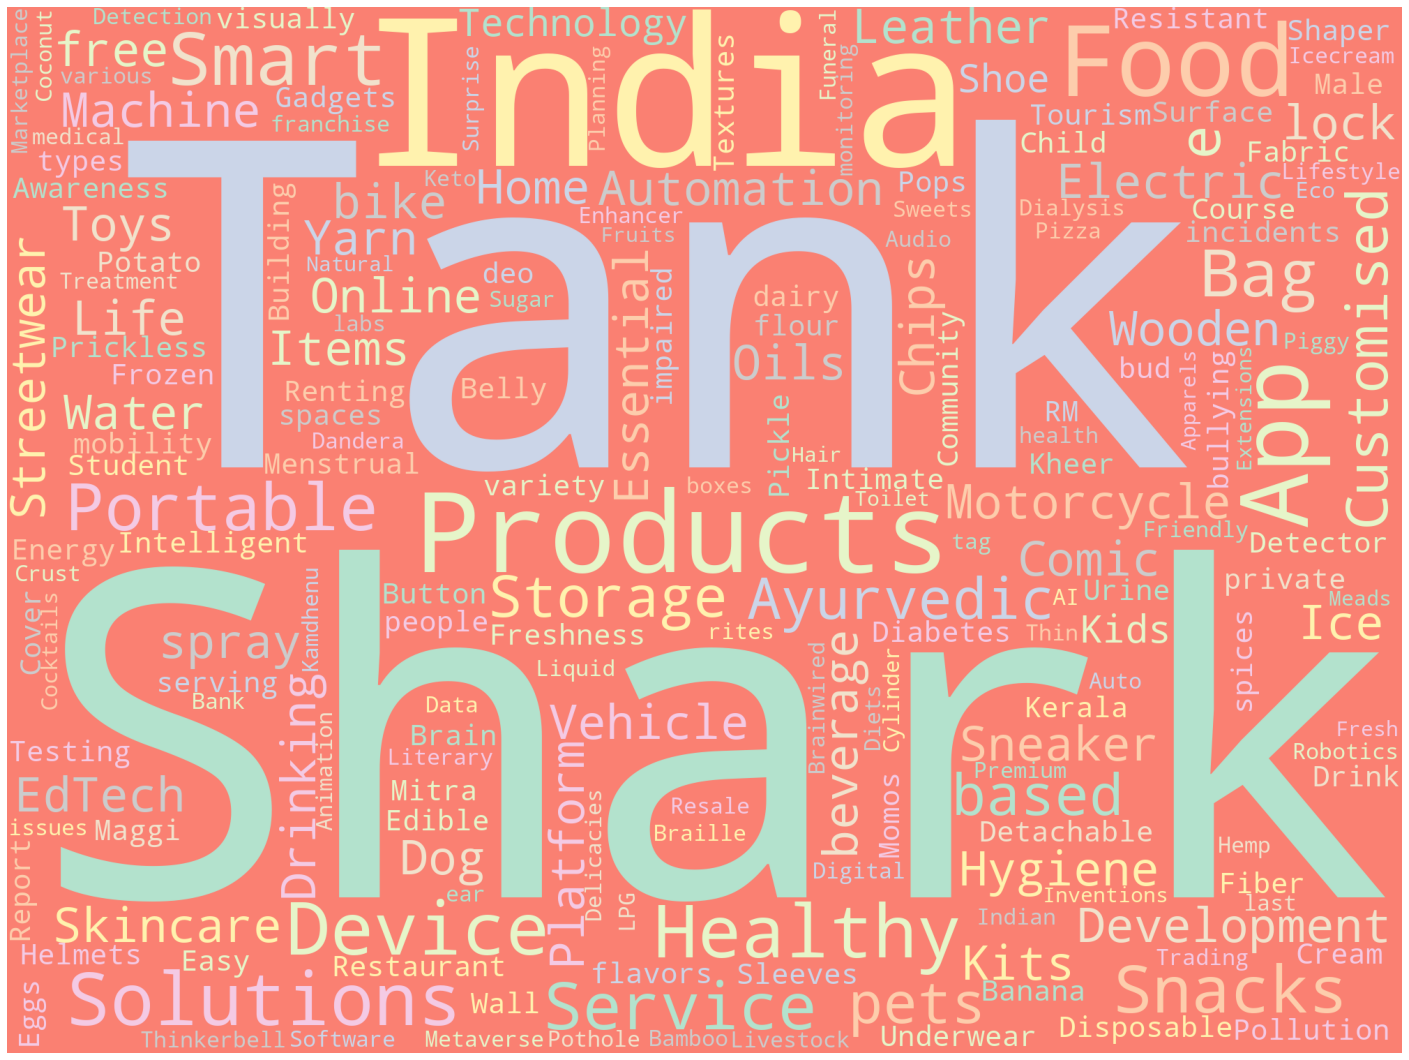

In [66]:
# Word cloud based on Business Description, startups came in season 1
text = " Shark Tank India ".join(cat for cat in shark_tank_season1['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

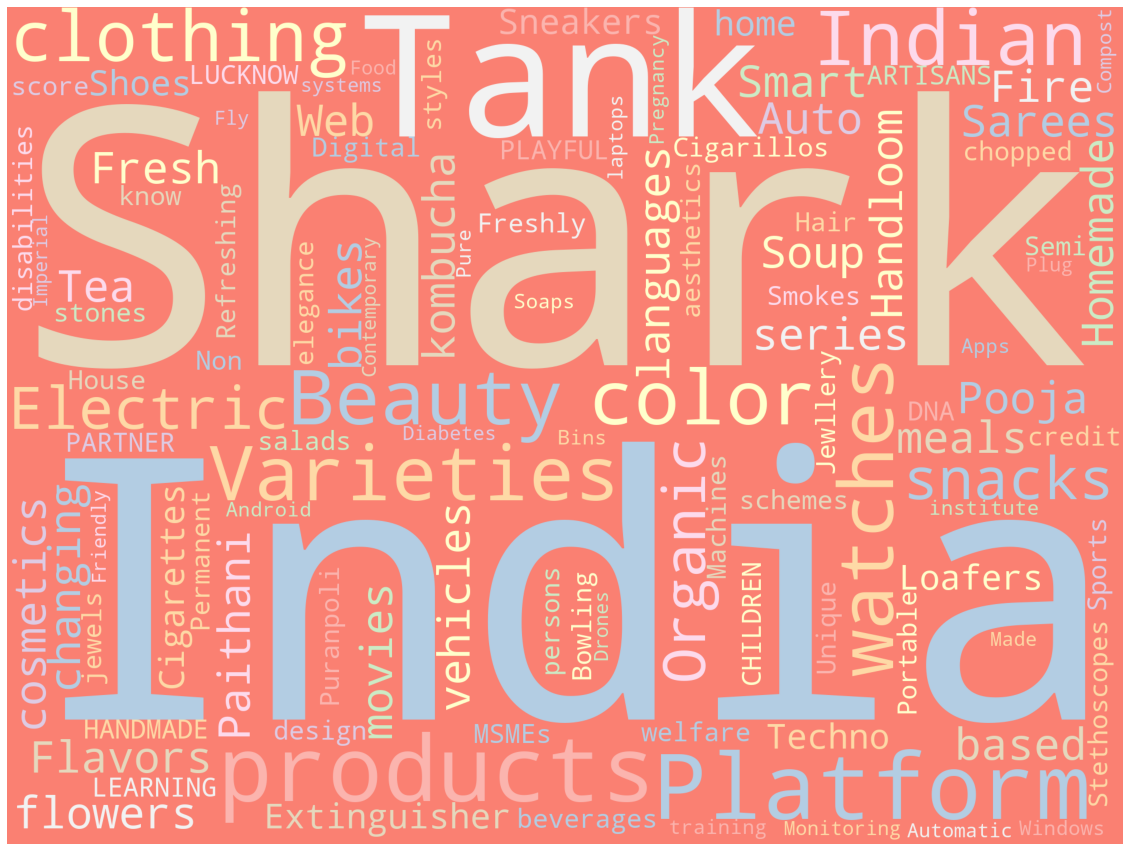

In [67]:
# Word cloud based on Business Description, startups came in season 2
text = " Shark Tank India ".join(cat for cat in shark_tank_season2.loc[shark_tank_season2['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data set values verification
##### below queries should not return any rows

In [68]:
shark_tank.loc[shark_tank['Number of Presenters'] != shark_tank['Male Presenters'].fillna(0) + shark_tank['Female Presenters'] + shark_tank['Transgender Presenters'].fillna(0)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Ask Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [69]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Ask Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [70]:
shark_tank.loc[(shark_tank['Male Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Ask Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [71]:
shark_tank.loc[(shark_tank['Female Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Ask Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [72]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Ashneer Investment Amount'].fillna(0) + shark_tank['Namita Investment Amount'].fillna(0) + shark_tank['Anupam Investment Amount'].fillna(0) + shark_tank['Vineeta Investment Amount'].fillna(0) + shark_tank['Aman Investment Amount'].fillna(0) + shark_tank['Peyush Investment Amount'].fillna(0) + shark_tank['Ghazal Investment Amount'].fillna(0), 1)]

Season Number  Episode Number                 Episode Title  \
187              2              13  Up And Coming Business Ideas   
188              2              13  Up And Coming Business Ideas   

     Pitch Number Startup Name        Industry          Business Description  \
187           188   Inside FPV   Manufacturing           Plug and Fly Drones   
188           189    Angrakhaa  Beauty/Fashion  Contemporary Indian clothing   

                Company Website  Number of Presenters  Male Presenters  \
187  https://www.insidefpv.com/                     3                2   
188  https://www.angrakhaa.com/                     2             <NA>   

     Female Presenters  Transgender Presenters  Couple Presenters  \
187                  1                    <NA>                0.0   
188                  2                    <NA>                0.0   

    Pitchers Average Age  Started in Pitchers City Pitchers State  \
187                Young        <NA>         Surat        Gujarat   
188                Young        <NA>           NaN            NaN   

     Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  \
187            <NA>           <NA>           NaN         NaN   
188            <NA>           <NA>           NaN         NaN   

     Original Ask Amount  Original Ask Equity  Valuation Requested  \
187                 75.0                  4.0               1875.0   
188                 40.0                  5.0                800.0   

     Received Offer  ...  Number of sharks in deal  Ashneer Investment Amount  \
187             1.0  ...                       4.0                        NaN   
188             1.0  ...                       1.0                        NaN   

     Ashneer Investment Equity  Ashneer Debt Amount  Namita Investment Amount  \
187                        NaN                  NaN                     18.75   
188                        NaN                  NaN                       NaN   

     Namita Investment Equity  Namita Debt Amount  Anupam Investment Amount  \
187                      3.75                 NaN                       NaN   
188                       NaN                 NaN                       NaN   

     Anupam Investment Equity  Anupam Debt Amount  Vineeta Investment Amount  \
187                       NaN                 NaN                        NaN   
188                       NaN                 NaN                        NaN   

     Vineeta Investment Equity  Vineeta Debt Amount  Aman Investment Amount  \
187                        NaN                  NaN                   18.75   
188                        NaN                  NaN                     NaN   

     Aman Investment Equity  Aman Debt Amount  Peyush Investment Amount  \
187                    3.75               NaN                     18.75   
188                     NaN               NaN                       NaN   

     Peyush Investment Equity  Peyush Debt Amount  Ghazal Investment Amount  \
187                      3.75                 NaN                       NaN   
188                       NaN                 NaN                       NaN   

     Ghazal Investment Equity  Ghazal Debt Amount  Amit Investment Amount  \
187                       NaN                 NaN                   18.75   
188                       NaN                 NaN                   40.00   

     Amit Investment Equity  Amit Debt Amount  
187                    3.75               NaN  
188                   20.00               NaN  

[2 rows x 56 columns]

In [73]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Ashneer Investment Equity'].fillna(0) + shark_tank['Namita Investment Equity'].fillna(0) + shark_tank['Anupam Investment Equity'].fillna(0) + shark_tank['Vineeta Investment Equity'].fillna(0) + shark_tank['Aman Investment Equity'].fillna(0) + shark_tank['Peyush Investment Equity'].fillna(0) + shark_tank['Ghazal Investment Equity'].fillna(0),1)]

Season Number  Episode Number                 Episode Title  \
187              2              13  Up And Coming Business Ideas   
188              2              13  Up And Coming Business Ideas   

     Pitch Number Startup Name        Industry          Business Description  \
187           188   Inside FPV   Manufacturing           Plug and Fly Drones   
188           189    Angrakhaa  Beauty/Fashion  Contemporary Indian clothing   

                Company Website  Number of Presenters  Male Presenters  \
187  https://www.insidefpv.com/                     3                2   
188  https://www.angrakhaa.com/                     2             <NA>   

     Female Presenters  Transgender Presenters  Couple Presenters  \
187                  1                    <NA>                0.0   
188                  2                    <NA>                0.0   

    Pitchers Average Age  Started in Pitchers City Pitchers State  \
187                Young        <NA>         Surat        Gujarat   
188                Young        <NA>           NaN            NaN   

     Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  \
187            <NA>           <NA>           NaN         NaN   
188            <NA>           <NA>           NaN         NaN   

     Original Ask Amount  Original Ask Equity  Valuation Requested  \
187                 75.0                  4.0               1875.0   
188                 40.0                  5.0                800.0   

     Received Offer  ...  Number of sharks in deal  Ashneer Investment Amount  \
187             1.0  ...                       4.0                        NaN   
188             1.0  ...                       1.0                        NaN   

     Ashneer Investment Equity  Ashneer Debt Amount  Namita Investment Amount  \
187                        NaN                  NaN                     18.75   
188                        NaN                  NaN                       NaN   

     Namita Investment Equity  Namita Debt Amount  Anupam Investment Amount  \
187                      3.75                 NaN                       NaN   
188                       NaN                 NaN                       NaN   

     Anupam Investment Equity  Anupam Debt Amount  Vineeta Investment Amount  \
187                       NaN                 NaN                        NaN   
188                       NaN                 NaN                        NaN   

     Vineeta Investment Equity  Vineeta Debt Amount  Aman Investment Amount  \
187                        NaN                  NaN                   18.75   
188                        NaN                  NaN                     NaN   

     Aman Investment Equity  Aman Debt Amount  Peyush Investment Amount  \
187                    3.75               NaN                     18.75   
188                     NaN               NaN                       NaN   

     Peyush Investment Equity  Peyush Debt Amount  Ghazal Investment Amount  \
187                      3.75                 NaN                       NaN   
188                       NaN                 NaN                       NaN   

     Ghazal Investment Equity  Ghazal Debt Amount  Amit Investment Amount  \
187                       NaN                 NaN                   18.75   
188                       NaN                 NaN                   40.00   

     Amit Investment Equity  Amit Debt Amount  
187                    3.75               NaN  
188                   20.00               NaN  

[2 rows x 56 columns]

In [74]:
shark_tank.loc[round(shark_tank['Total Deal Debt'].fillna(0),1) != round(shark_tank['Ashneer Debt Amount'].fillna(0) + shark_tank['Namita Debt Amount'].fillna(0) + shark_tank['Anupam Debt Amount'].fillna(0) + shark_tank['Vineeta Debt Amount'].fillna(0) + shark_tank['Aman Debt Amount'].fillna(0) + shark_tank['Peyush Debt Amount'].fillna(0) + shark_tank['Ghazal Debt Amount'].fillna(0),1)]

Empty DataFrame
Columns: [Season Number, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Ask Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Valuation Offered, Number of sharks in deal, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount]
Index: []

[0 rows x 56 columns]

In [75]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [76]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.3
# seaborn version: 0.11.2
# plotly version: 5.11.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.3
seaborn version: 0.11.2
plotly version: 5.11.0


### ⭐  Hindi Bigg Boss Season16
### https://www.kaggle.com/code/thirumani/predicting-bigg-boss-hindi-season-16-winner
